In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')

In [78]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

In [79]:
# Order: ["Description", "Accuracy", "Precision", "Recall", "Weighted Score"]
# Example: ["Original dataset, no Pregnancies, Oversampling, standardization", 0.75, 0.8, 0.7, 0.75]
nn_metrics = []

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.yticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.show()

In [82]:
from sklearn.metrics import roc_curve, auc

def calculate_auc(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    return auc_score


## Original Dataset testing
En esta sección se presenta el dataset original al que se le aplican las técnicas de normalización y estandarización. Y se prueba con el modelo de Red Neuronal Artificial.

### Original Dataset

Accuracy: 0.66
Recall: 0.28
Precision: 0.5
AUC: 0.67


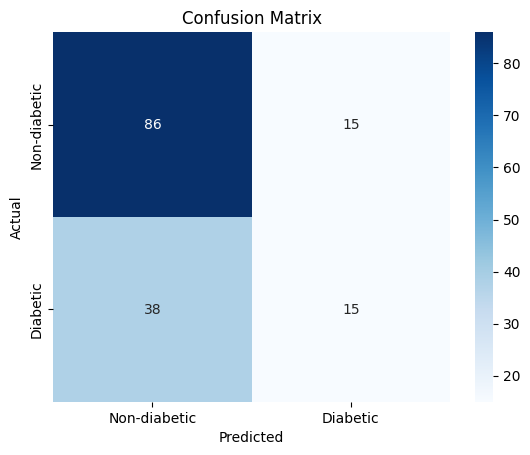

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Split the data into training and testing sets
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["Original dataset", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)


### Original Dataset, Normalized

Accuracy: 0.75
Recall: 0.51
Precision: 0.69
AUC: 0.49


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


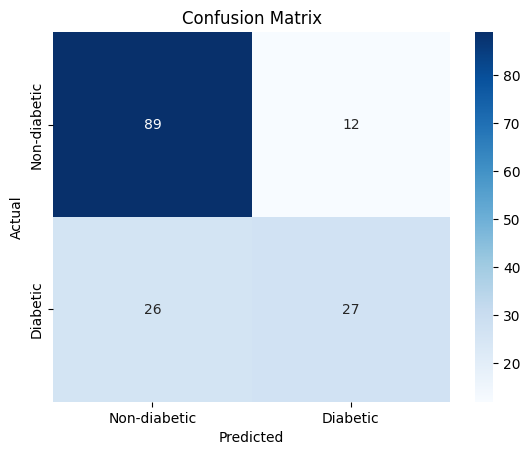

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaler_std = MinMaxScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["Original dataset, normalized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Original Dataset, Standardized

Accuracy: 0.77
Recall: 0.57
Precision: 0.7
AUC: 0.56


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


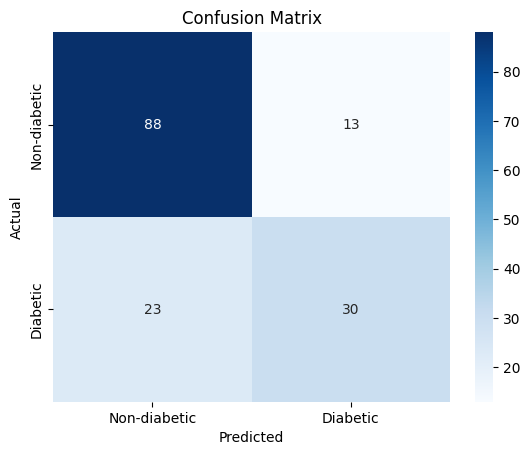

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["Original dataset, standardized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

## Original dataset without the 'Pregnancies' column.
En esta sección se presenta el dataset original **sin la columna 'Pregnancies'** al que se le aplican las técnicas de normalización y estandarización. Y se prueba con el modelo de Red Neuronal Artificial.

### Original Dataset without the 'Pregnancies' column

Accuracy: 0.68
Recall: 0.28
Precision: 0.56
AUC: 0.65


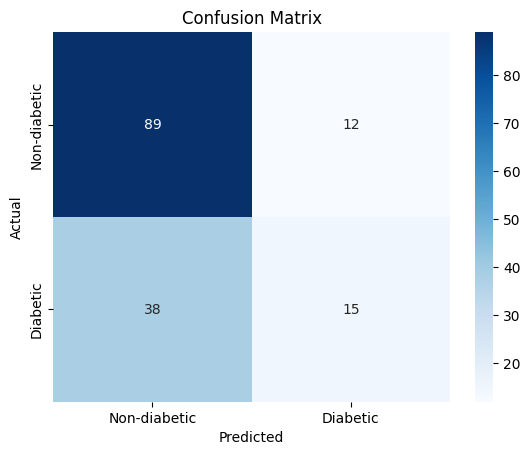

In [86]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Pregnancies dataset", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Original Dataset without the 'Pregnancies' column, standardized

Accuracy: 0.77
Recall: 0.55
Precision: 0.71
AUC: 0.51


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


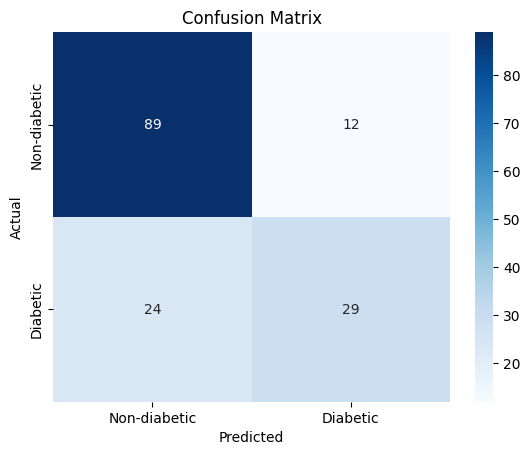

In [87]:
from sklearn.preprocessing import StandardScaler
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Pregnancies dataset, standardized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Original Dataset without the 'Pregnancies' column, normalized

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.75
Recall: 0.49
Precision: 0.68
AUC: 0.49


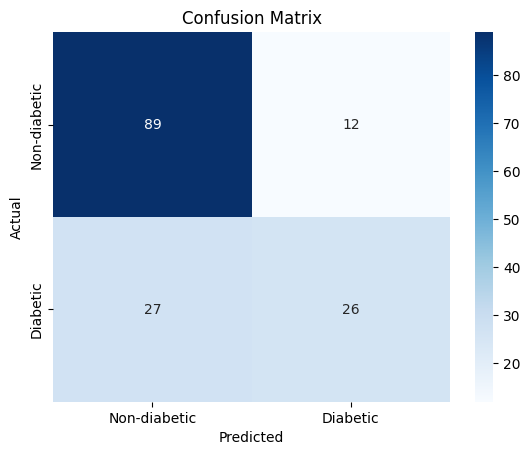

In [88]:
from sklearn.preprocessing import MinMaxScaler
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


scaler_std = MinMaxScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Pregnancies dataset, normalized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

## Dataset No Outliers
En esta sección se presenta el dataset sin outliers al que se le aplican las técnicas de normalización y estandarización. Y se prueba con el modelo de Red Neuronal Artificial.

### Dataset No Outliers

Accuracy: 0.74
Recall: 0.36
Precision: 0.6
AUC: 0.76


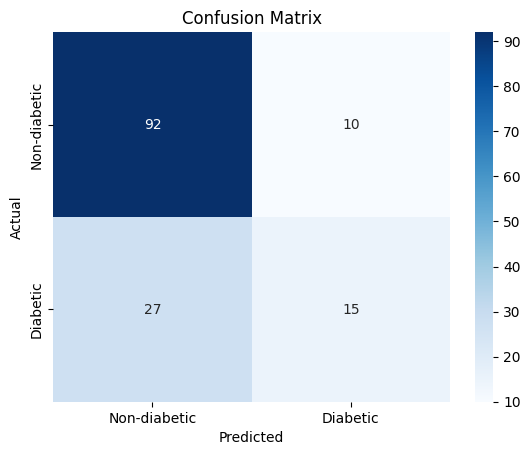

In [89]:
from scipy import stats

# Removing outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome'], axis=1)
y = df_filtered['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Outliers", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Dataset No Outliers, normalized

Accuracy: 0.83
Recall: 0.67
Precision: 0.72
AUC: 0.5


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


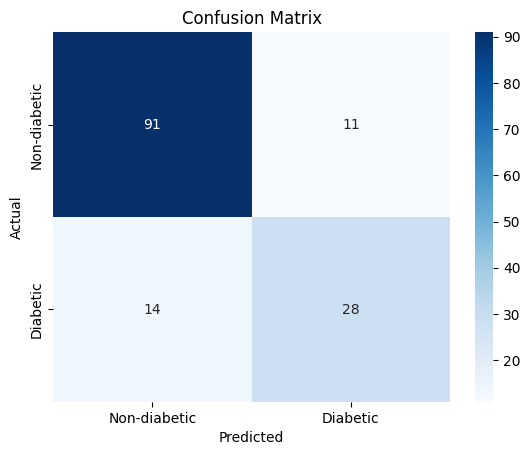

In [90]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Removing outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaler_std = MinMaxScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Outliers, normalized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Dataset No Outliers, standardized

Accuracy: 0.81
Recall: 0.67
Precision: 0.68
AUC: 0.55


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


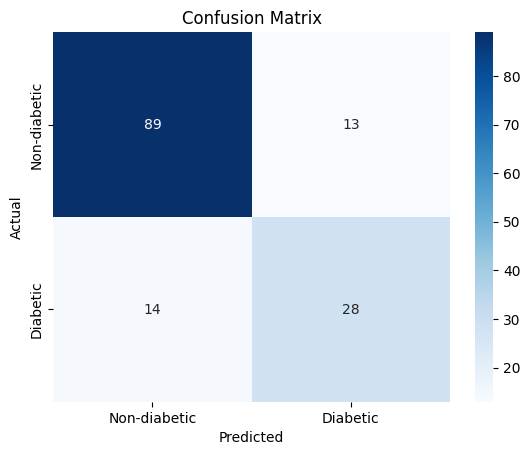

In [91]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Removing outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Outliers, standardized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Checking dataset having removed Outliers

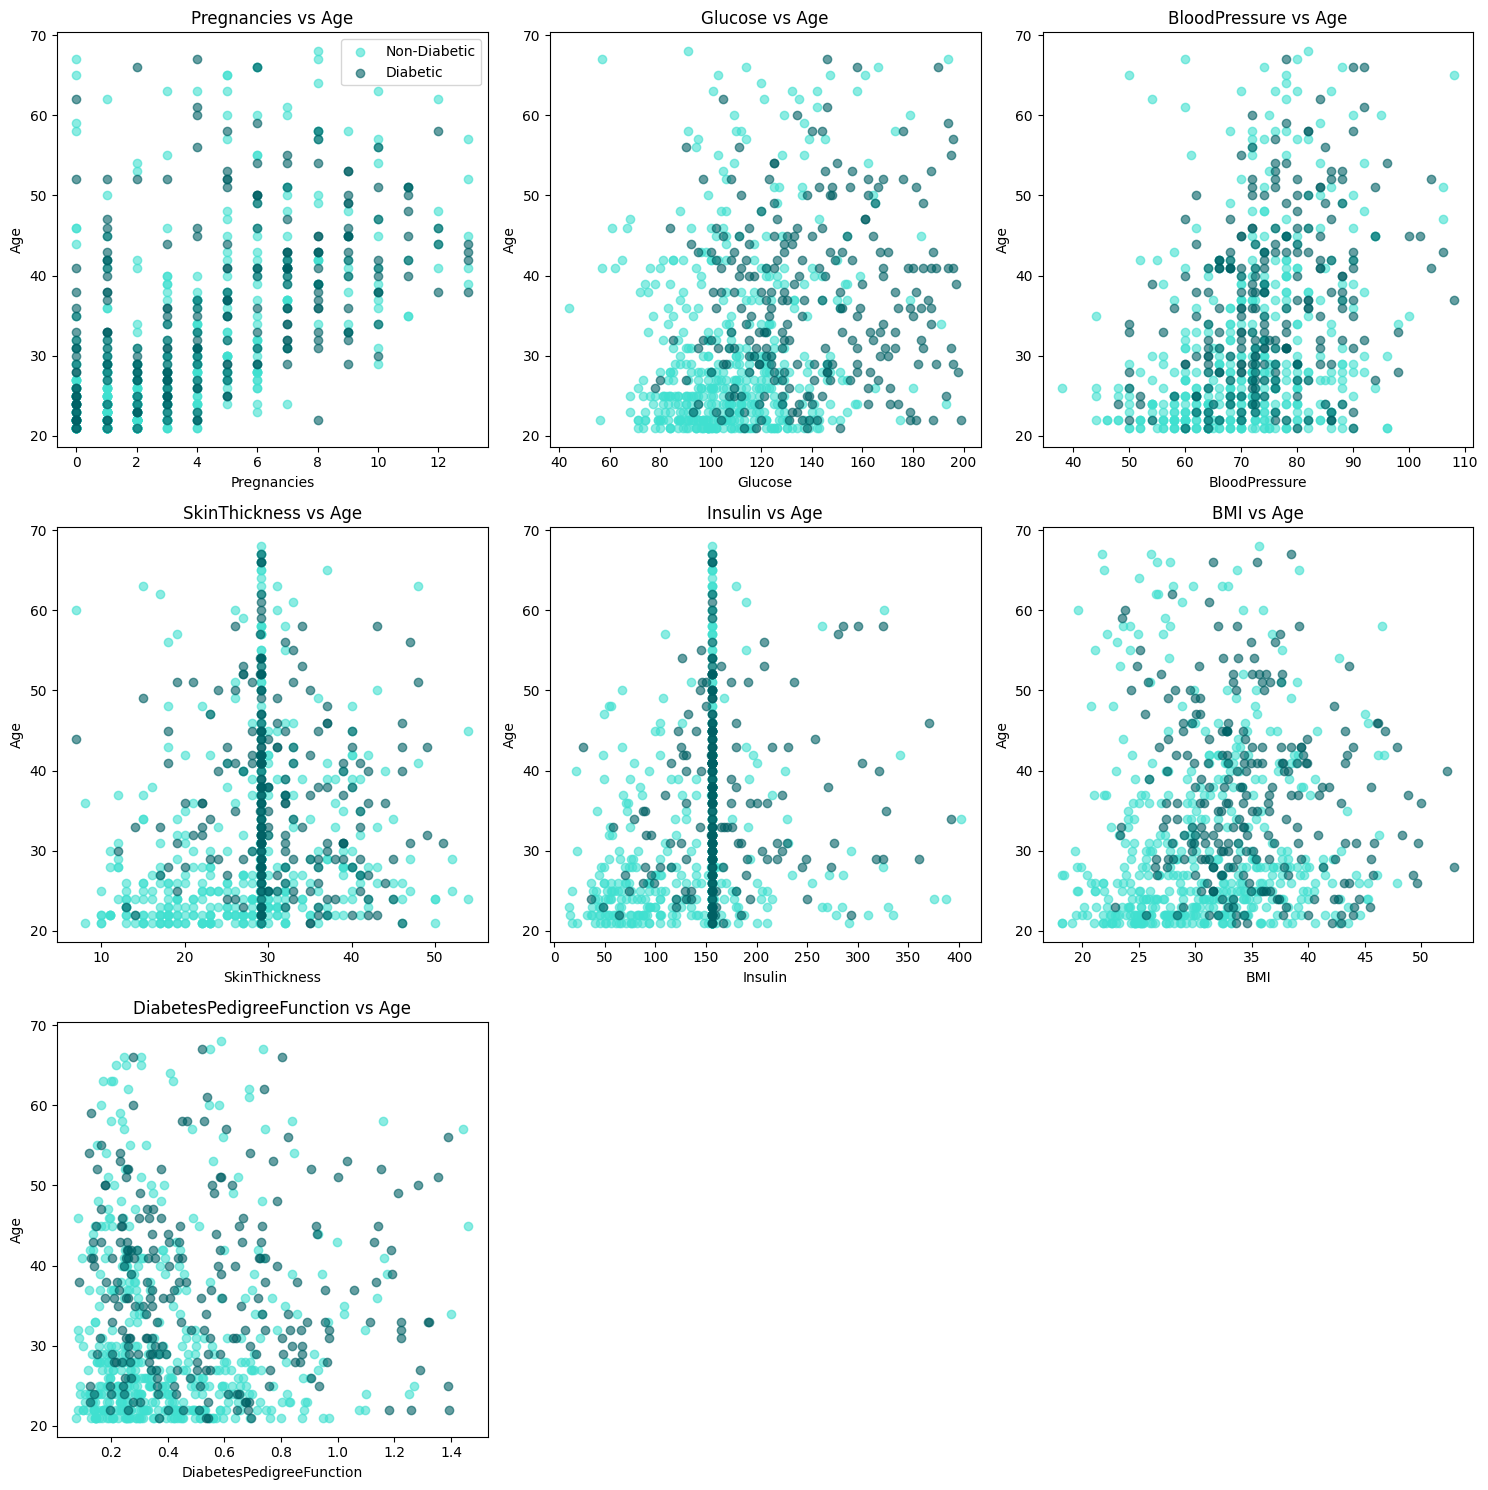

In [92]:
def scatter_plots_grid_by_feature_and_split(df, features, split_column, y_column, labels):
    num_features = len(features)
    colors = ['#40E0D0', '#006064']

    num_rows = (num_features + 2) // 3  

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  
    axes_flattened = axes.flatten() if num_rows > 1 else [axes]

    for i, feature in enumerate(features):
        ax = axes_flattened[i]
        for idx, outcome in enumerate(sorted(df[split_column].unique())):
            subset = df[df[split_column] == outcome]
            ax.scatter(subset[feature], subset[y_column], c=colors[idx], label=labels[idx], alpha=0.6)

        ax.set_title(f'{feature} vs {y_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel(y_column)
        if i == 0:  
            ax.legend()

    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes_flattened[i])

    plt.tight_layout()  
    plt.show()

labels = ['Non-Diabetic', 'Diabetic']
scatter_plots_grid_by_feature_and_split(df_filtered, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], 'Outcome', 'Age', labels)

## Dataset No Outliers without the Pregnancies Column
En esta sección se presenta el dataset sin outliers **sin la columna 'Pregnancies'** al que se le aplican las técnicas de normalización y estandarización. Y se prueba con el modelo de Red Neuronal Artificial.

### Dataset No Outliers without the Pregnancies Column

Accuracy: 0.73
Recall: 0.38
Precision: 0.55
AUC: 0.77


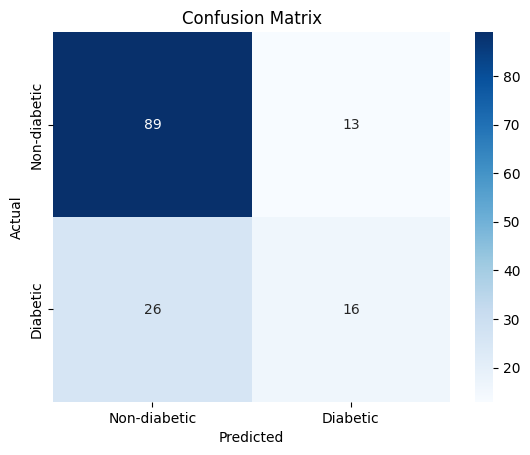

In [93]:
from scipy import stats

# Removing outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No outliers, No Pregnancies dataset", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Dataset No Outliers without the Pregnancies Column, normalized

Accuracy: 0.85
Recall: 0.74
Precision: 0.76
AUC: 0.5


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


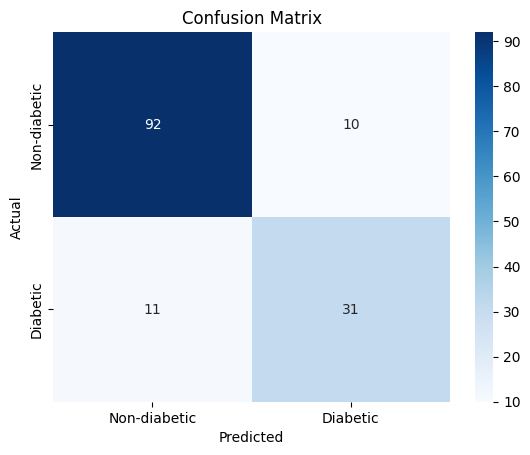

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Removing outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


scaler_std = MinMaxScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No outliers, No Pregnancies dataset, normalized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Dataset No Outliers without the Pregnancies Column, standardized

Accuracy: 0.83
Recall: 0.71
Precision: 0.71
AUC: 0.56


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


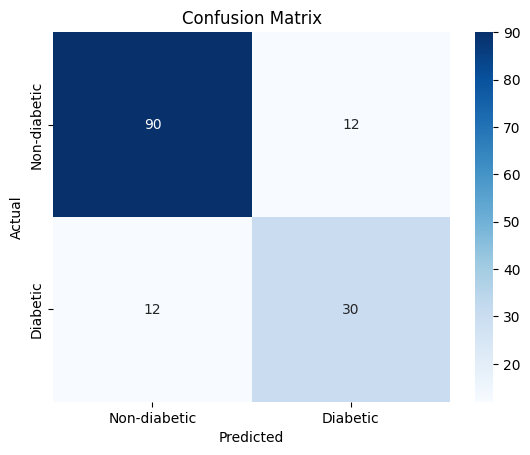

In [95]:
from sklearn.preprocessing import StandardScaler

# Removing outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_std, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No outliers, No Pregnancies dataset, standardized", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

## Getting the order from best to worst model based on weighted score
En esta sección se presenta el orden de los modelos de mejor a peor desempeño basado en el puntaje ponderado.

In [104]:
sorted_metrics_rounded = []

for metric in nn_metrics:
    rounded_metric = [metric[0]]
    for value in metric[1:]:
        rounded_value = round(value, 2)
        rounded_metric.append(rounded_value)
    sorted_metrics_rounded.append(rounded_metric)

sorted_metrics_rounded.sort(key=lambda x: x[4], reverse=True)

cont = 1
for metric in sorted_metrics_rounded:
    print(f"================================================")
    print(cont)
    print(f"Description: {metric[0]}")
    print(f"Accuracy: {metric[1]}, Precision: {metric[2]}, Recall: {metric[3]}, AUC: {metric[4]}")
    cont += 1

1
Description: No outliers, No Pregnancies dataset
Accuracy: 0.73, Precision: 0.55, Recall: 0.38, AUC: 0.77
2
Description: No Outliers
Accuracy: 0.74, Precision: 0.6, Recall: 0.36, AUC: 0.76
3
Description: Original dataset
Accuracy: 0.66, Precision: 0.5, Recall: 0.28, AUC: 0.67
4
Description: No Pregnancies dataset
Accuracy: 0.68, Precision: 0.56, Recall: 0.28, AUC: 0.65
5
Description: Original dataset, standardized
Accuracy: 0.77, Precision: 0.7, Recall: 0.57, AUC: 0.56
6
Description: No outliers, No Pregnancies dataset, standardized
Accuracy: 0.83, Precision: 0.71, Recall: 0.71, AUC: 0.56
7
Description: No Outliers, standardized
Accuracy: 0.81, Precision: 0.68, Recall: 0.67, AUC: 0.55
8
Description: No Pregnancies dataset, standardized
Accuracy: 0.77, Precision: 0.71, Recall: 0.55, AUC: 0.51
9
Description: No Outliers, normalized
Accuracy: 0.83, Precision: 0.72, Recall: 0.67, AUC: 0.5
10
Description: No outliers, No Pregnancies dataset, normalized
Accuracy: 0.85, Precision: 0.76, Rec

## Other additional testing
En esta sección se presentan pruebas adicionales con otras configuraciones de los datos y modelos que no arrojaron tan buenos resultados.

### Testing the model with the original dataset, standarizing the data and tunnig the parameters

Best hyperparameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 24, 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy: 0.78
Recall: 0.58
Precision: 0.72
AUC: 0.59


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


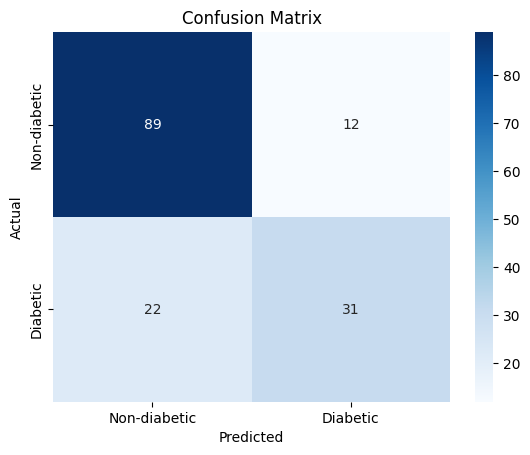

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Create the randomized search object with the pipeline
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train_std, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(best_model, X_test, y_test), 2))

nn_metrics.append(["Original dataset, standardization, RandomizedSearchCV", accuracy, precision, recall, calculate_auc(best_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Testing model with no Pregnacies column and oversampling

Accuracy: 0.59
Recall: 0.74
Precision: 0.44
AUC: 0.69


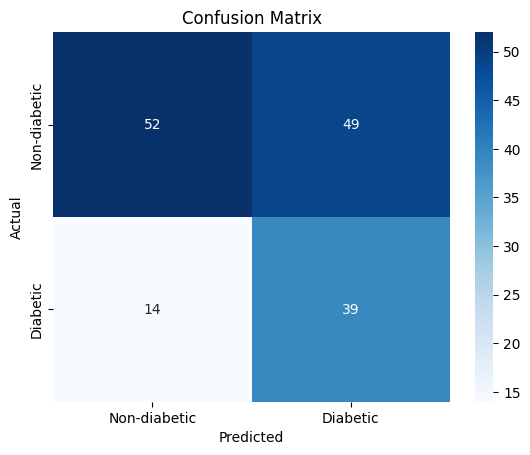

In [106]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Oversample the minority class (Diabetic examples) using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train the neural network on the resampled data
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Pregnancies dataset, Oversampling", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Testing model with no Pregnacies column and undersampling

Accuracy: 0.6
Recall: 0.51
Precision: 0.43
AUC: 0.66


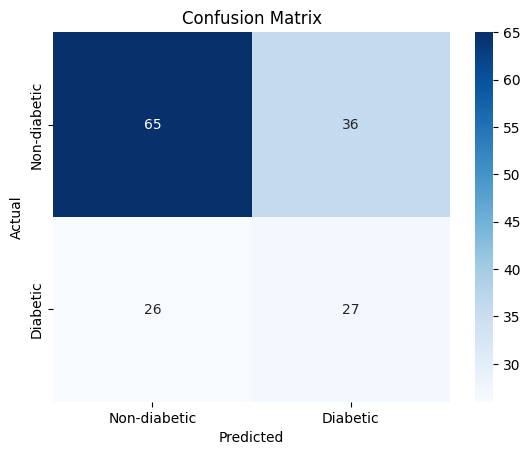

In [107]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Undersample the majority class (Non-Diabetic examples) using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train the neural network on the resampled data
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Pregnancies dataset, Undersampling", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Testing model with no Pregnacies column and arbitrarily selecting hidden layers

Accuracy: 0.57
Recall: 0.75
Precision: 0.43
AUC: 0.68


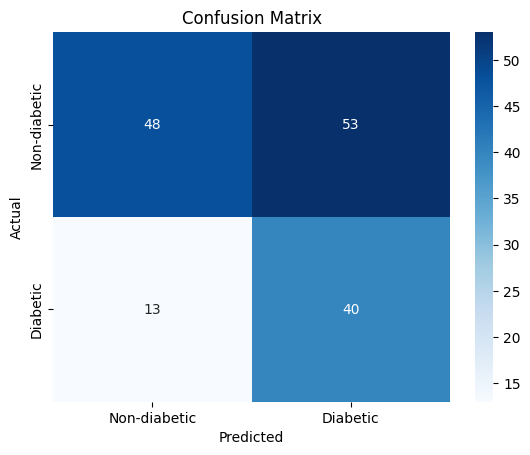

In [108]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the neural network with two hidden layers
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(nn_model, X_test, y_test), 2))

nn_metrics.append(["No Pregnancies dataset, 2 hidden layers", accuracy, precision, recall, calculate_auc(nn_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

## Parameter Tuning for the best datasets preprocessing
En esta sección se presenta el ajuste de parámetros para los mejores datasets preprocesados. Aunque estandarizar y normalizar los datos no hayan estado en el top 5 en la sección anterior, se probarán de igual forma para ver si se obtienen mejores resultados.

**Nota:** El modelo _No outliers, No Pregnancies dataset, normalized_ se utilizará para la comparación con el resto de modelos para que la comparación sea justa y se utilice el mismo dataset.

### Testing model removing Outliers, removing Pregnacies column, using randomized search for parameter tuning and standardizing the data

Best hyperparameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 23, 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy: 0.83
Recall: 0.71
Precision: 0.7
AUC: 0.69


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


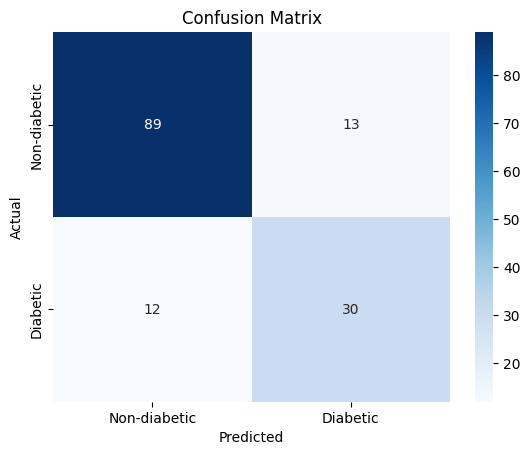

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

# Calculate Z-scores and filter outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Split the data into features and target
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the preprocessing pipeline
# You can choose either StandardScaler or MinMaxScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Create the randomized search object with the pipeline
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train_std, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(best_model, X_test, y_test), 2))

nn_metrics.append(["No Outliers, No Pregnancies dataset, standardized, RandomizedSearchCV", accuracy, precision, recall, calculate_auc(best_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

### Testing model removing Outliers, removing Pregnacies column, using randomized search for parameter tuning and normalizing the data

Como se mencionó anteriormente los resultados obtenidos por este modelo con el dataset _No outliers, No Pregnancies dataset, normalized_ se compararán con los resultados obtenidos por los otro modelos KNN y Regresión Logística.

Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 29, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Accuracy: 0.83
Recall: 0.81
Precision: 0.67
AUC: 0.89


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


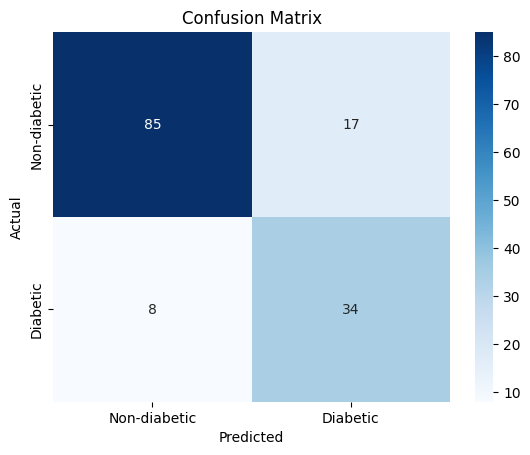

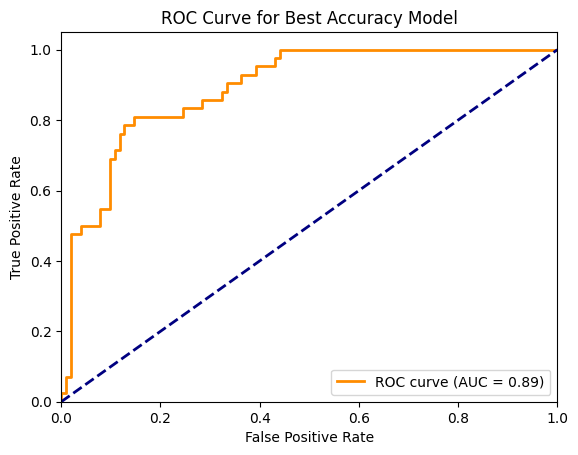

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc

# Calculate Z-scores and filter outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Split the data into features and target
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

scaler_std = MinMaxScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Create the randomized search object with the pipeline
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train_std, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

y_scores_acc = best_model.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_acc)
roc_auc = auc(fpr, tpr)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(best_model, X_test_std, y_test), 2))

nn_metrics.append(["No Outliers, No Pregnancies dataset, normalized, RandomizedSearchCV", accuracy, precision, recall, calculate_auc(best_model, X_test_std, y_test)])

plot_confusion_matrix(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Accuracy Model')
plt.legend(loc="lower right")
plt.show()

### Testing model removing Outliers, removing Pregnacies column, using randomized search for parameter tuning

Best hyperparameters: {'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': 52, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Accuracy: 0.83
Recall: 0.74
Precision: 0.69
AUC: 0.89


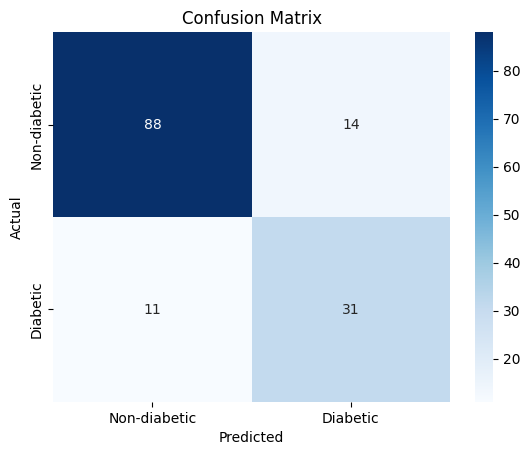

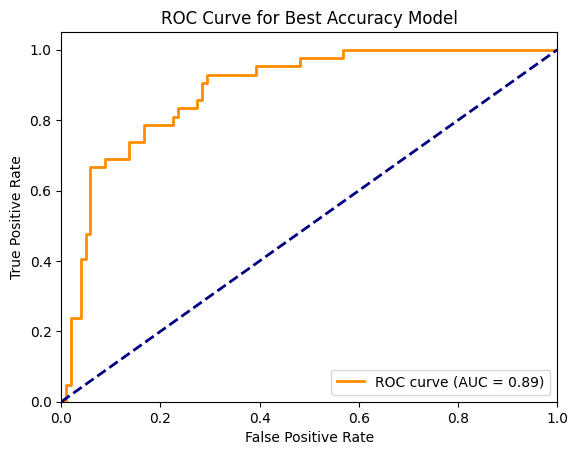

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats
import numpy as np
from sklearn.metrics import roc_curve, auc

# Calculate Z-scores and filter outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Split the data into features and target
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the randomized search object with the pipeline
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUC:", round(calculate_auc(best_model, X_test, y_test), 2))

nn_metrics.append(["No Outliers, No Pregnancies dataset, RandomizedSearchCV", accuracy, precision, recall, calculate_auc(best_model, X_test, y_test)])

plot_confusion_matrix(y_test, y_pred)

y_scores_acc = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_acc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Accuracy Model')
plt.legend(loc="lower right")
plt.show()

## Model training comparison
En esta sección se presenta una comparación de los modelos entrenados con los mejores datasets preprocesados y ajuste de parámetros.

In [112]:
sorted_metrics_rounded = []

for metric in nn_metrics:
    rounded_metric = [metric[0]]
    for value in metric[1:]:
        rounded_value = round(value, 2)
        rounded_metric.append(rounded_value)
    sorted_metrics_rounded.append(rounded_metric)

sorted_metrics_rounded.sort(key=lambda x: x[4], reverse=True)

cont = 1
for metric in sorted_metrics_rounded:
    print(f"================================================")
    print(cont)
    print(f"Description: {metric[0]}")
    print(f"Accuracy: {metric[1]}, Precision: {metric[2]}, Recall: {metric[3]}, AUC: {metric[4]}")
    cont += 1

1
Description: No Outliers, No Pregnancies dataset, normalized, RandomizedSearchCV
Accuracy: 0.83, Precision: 0.67, Recall: 0.81, AUC: 0.89
2
Description: No Outliers, No Pregnancies dataset, RandomizedSearchCV
Accuracy: 0.83, Precision: 0.69, Recall: 0.74, AUC: 0.89
3
Description: No outliers, No Pregnancies dataset
Accuracy: 0.73, Precision: 0.55, Recall: 0.38, AUC: 0.77
4
Description: No Outliers
Accuracy: 0.74, Precision: 0.6, Recall: 0.36, AUC: 0.76
5
Description: No Pregnancies dataset, Oversampling
Accuracy: 0.59, Precision: 0.44, Recall: 0.74, AUC: 0.69
6
Description: No Outliers, No Pregnancies dataset, standardized, RandomizedSearchCV
Accuracy: 0.83, Precision: 0.7, Recall: 0.71, AUC: 0.69
7
Description: No Pregnancies dataset, 2 hidden layers
Accuracy: 0.57, Precision: 0.43, Recall: 0.75, AUC: 0.68
8
Description: Original dataset
Accuracy: 0.66, Precision: 0.5, Recall: 0.28, AUC: 0.67
9
Description: No Pregnancies dataset, Undersampling
Accuracy: 0.6, Precision: 0.43, Recall

Como se puede observar el modelo con mejor desempeño es el que se obtiene al remover los outliers, remover la columna 'Pregnancies', normalizar los datos y realizando RandomizedSearchCV para encontrar los mejores hiperparámetros para el modelo. Con las siguientes métricas:
- **Accuracy**: 0.83
- **Precision**: 0.67
- **Recall**: 0.79
- **AUC**: 0.90